# Importing Important Libraries

In [247]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reading Data from the dataset

In [248]:
test_dir='/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
train_dir='/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
validation_dir='/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'

# Re-Scalling Data

In [249]:
img_size=64
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.08,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.7, 1.3]
)



validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size,img_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        seed = 42
)

test_generator=test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size,img_size),
        batch_size=batch_size,
        shuffle=True,
        seed = 42,
        class_mode='categorical'
)

validation_generator=validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size,img_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        seed = 42
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


# EDA

## Counting Images

In [250]:
def count_images(directory):
    class_counts={}
    for class_name in os.listdir(directory):
        class_dir=os.path.join(directory,class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name]=len(os.listdir(class_dir))
    return class_counts
train_counts=count_images(train_dir)
test_counts=count_images(test_dir)
validation_counts=count_images(validation_dir)

print("Training data distribution:", train_counts)
print("Test data distribution:", test_counts)
print("Validation data distribution:", validation_counts)

Training data distribution: {'Broccoli': 1000, 'Capsicum': 1000, 'Bottle_Gourd': 1000, 'Radish': 1000, 'Tomato': 1000, 'Brinjal': 1000, 'Pumpkin': 1000, 'Carrot': 1000, 'Papaya': 1000, 'Cabbage': 1000, 'Bitter_Gourd': 1000, 'Cauliflower': 1000, 'Bean': 1000, 'Cucumber': 1000, 'Potato': 1000}
Test data distribution: {'Broccoli': 200, 'Capsicum': 200, 'Bottle_Gourd': 200, 'Radish': 200, 'Tomato': 200, 'Brinjal': 200, 'Pumpkin': 200, 'Carrot': 200, 'Papaya': 200, 'Cabbage': 200, 'Bitter_Gourd': 200, 'Cauliflower': 200, 'Bean': 200, 'Cucumber': 200, 'Potato': 200}
Validation data distribution: {'Broccoli': 200, 'Capsicum': 200, 'Bottle_Gourd': 200, 'Radish': 200, 'Tomato': 200, 'Brinjal': 200, 'Pumpkin': 200, 'Carrot': 200, 'Papaya': 200, 'Cabbage': 200, 'Bitter_Gourd': 200, 'Cauliflower': 200, 'Bean': 200, 'Cucumber': 200, 'Potato': 200}


## Ploting some bar graphs for the catagory/class vs frequency of images in it

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


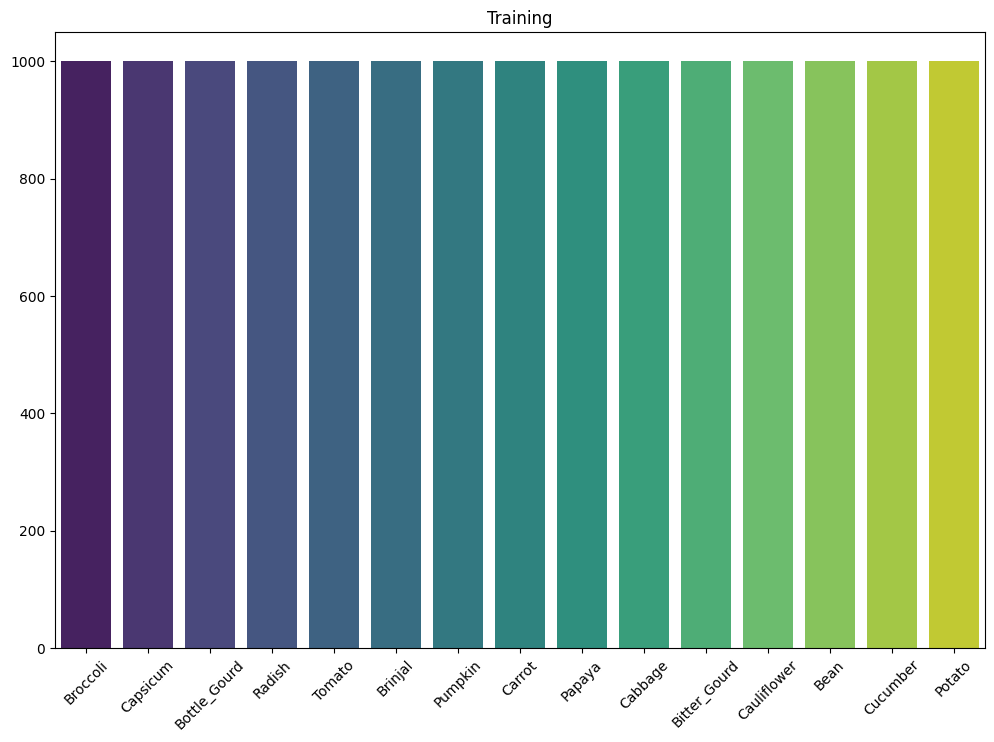

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


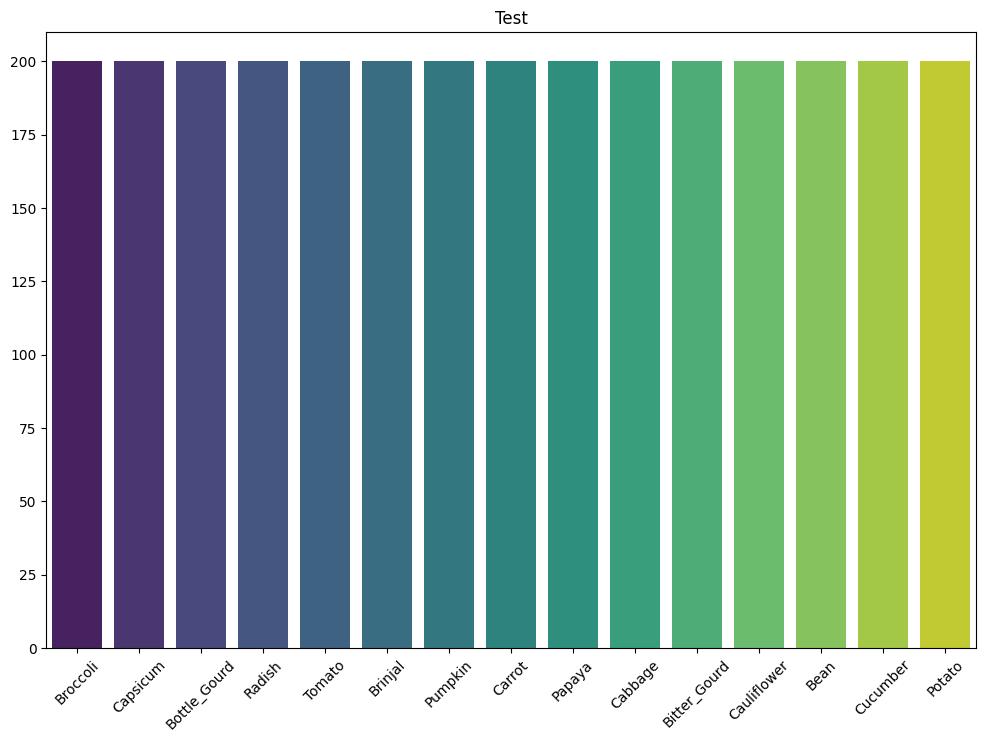

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


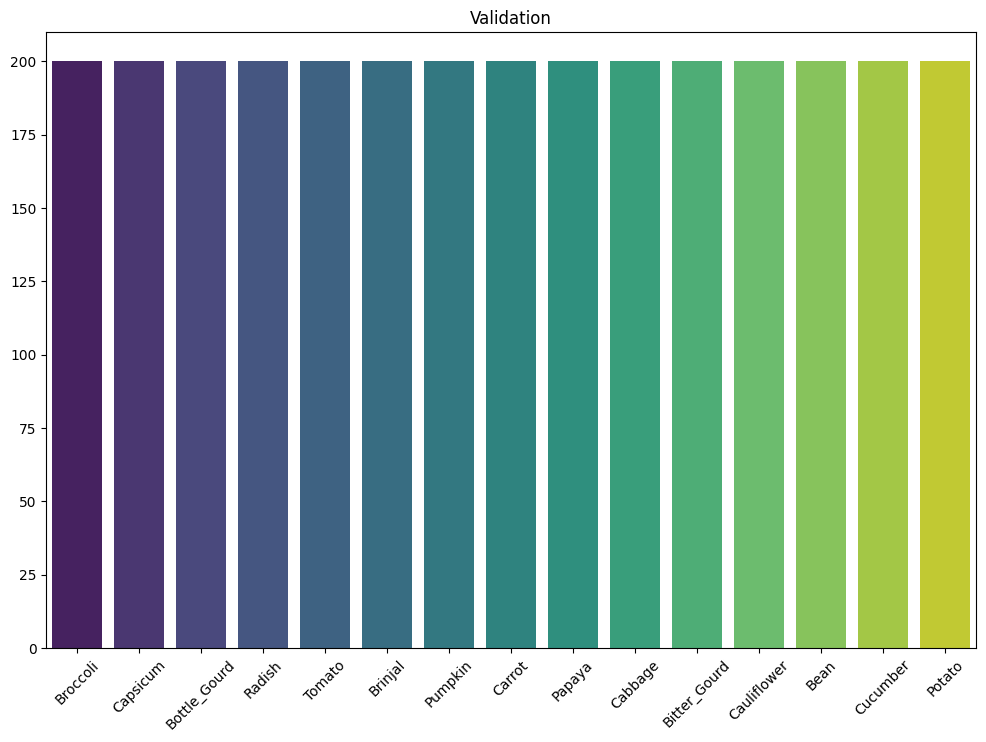

In [251]:
import seaborn as sns
def plot_graph(counts,title):
    plt.figure(figsize=(12,8))
    sns.barplot(x= list(counts.keys()), y= list(counts.values()), palette='viridis')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_graph(train_counts,"Training")
plot_graph(test_counts,"Test")
plot_graph(validation_counts,"Validation")

## Plotting a picuture from dataset

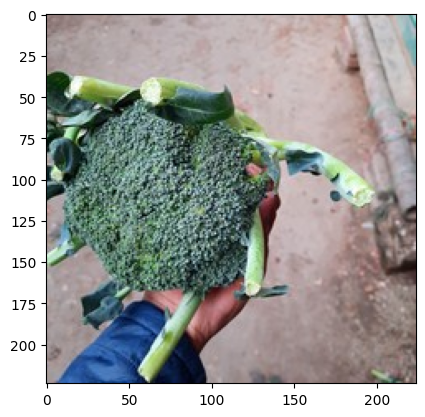

In [252]:
import matplotlib.image as mpimg

image_files = []
for root, dirs, files in os.walk('/kaggle/input/vegetable-image-dataset/Vegetable Images/test'):
    for file in files:
        if file.endswith((".jpg", ".jpeg", ".png")):
            image_files.append(os.path.join(root, file))
img = mpimg.imread(image_files[0])
plt.imshow(img)

## Applying some channels on the picture selected earlier

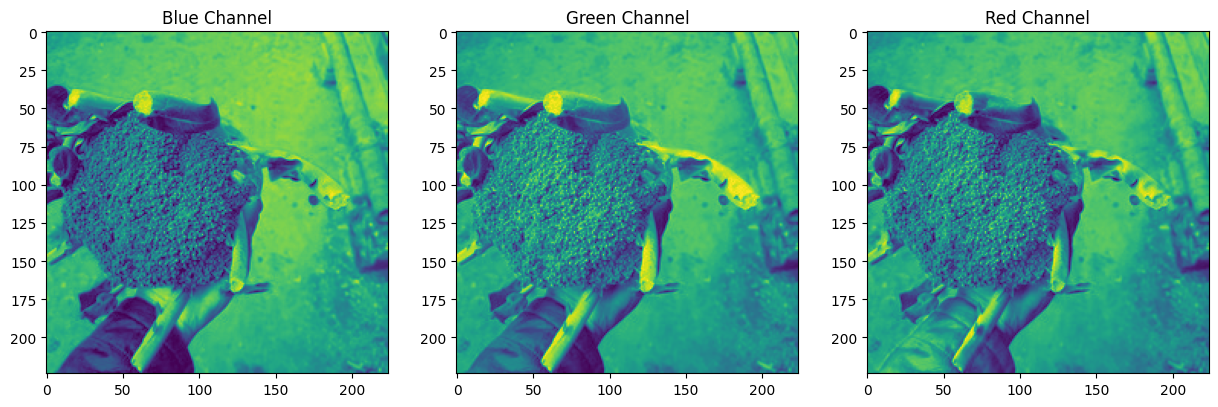

In [253]:
import cv2
blue,green,red = cv2.split(img)

fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)

plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

## Plotting some more random pictures from the dataset

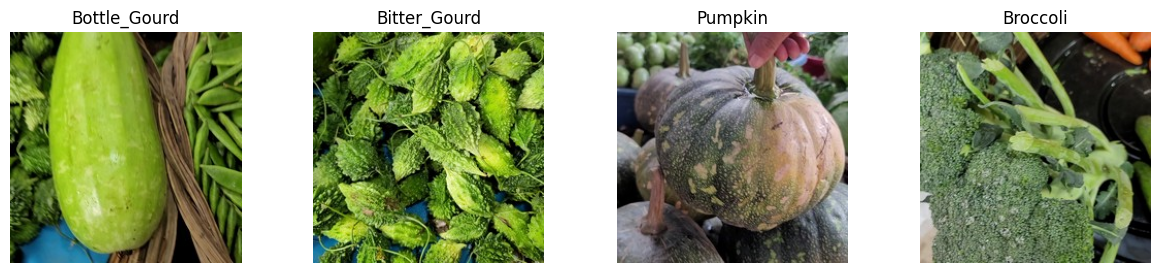

In [254]:
import random
def visualize_random_images(directory, num_images=5):
    # Get a list of all image files
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    # Randomly select images
    random_images = random.sample(image_files, num_images)

    # Plot the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, image_path in enumerate(random_images):
        img = mpimg.imread(image_path)
        subfolder_name = os.path.basename(os.path.dirname(image_path))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(subfolder_name)  # Set subfolder name as title
    plt.show()
visualize_random_images('/kaggle/input/vegetable-image-dataset/Vegetable Images/train', num_images=4)

## Titles of different classes

In [255]:
classes = list(train_generator.class_indices.keys())
classes

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

# Modeling

## Applying some CNN layers on the training data

In [256]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])



model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Training

In [257]:
epochs = 15

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 97s 102ms/step - accuracy: 0.2176 - loss: 2.2733 - val_accuracy: 0.5511 - val_loss: 1.2931
Epoch 2/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - accuracy: 0.5625 - loss: 1.4028 - val_accuracy: 0.6250 - val_loss: 1.2740
Epoch 3/15


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.4837 - loss: 1.4838 - val_accuracy: 0.6457 - val_loss: 0.9933
Epoch 4/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3125 - loss: 1.6221 - val_accuracy: 0.8750 - val_loss: 0.3725
Epoch 5/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.5842 - loss: 1.2165 - val_accuracy: 0.7179 - val_loss: 0.7915
Epoch 6/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.5625 - loss: 1.1220 - val_accuracy: 0.7500 - val_loss: 0.5876
Epoch 7/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.6626 - loss: 1.0059 - val_accuracy: 0.7149 - val_loss: 0.8467
Epoch 8/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.4375 - loss: 1.3483 - val_accuracy: 1.0000 - val_loss: 0.1647
Epoch 9/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 84s 90ms/step - accuracy: 0.7002 - loss: 0.9091 - val_accuracy: 0.7560 - val_loss: 0.7972
Epoch 10/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 0.6875 - loss: 1.0841 - val_accuracy: 0

## Testing Model and determining accuracy of the model

In [258]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

187/187 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8967 - loss: 0.3155
Test Accuracy: 89.44%


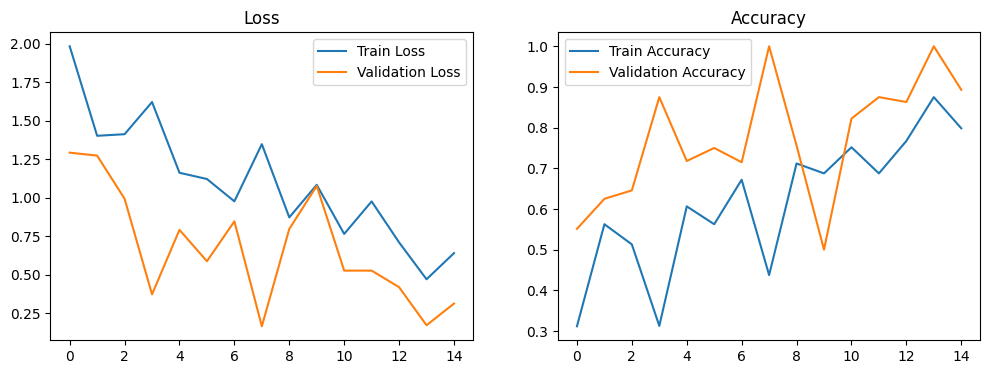

In [259]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

## Saving the Model

In [260]:
model.save('vegetable_classifier_model.h5')

# Testing on my own image of a vegetable

## Fetching the image

In [276]:
image_path = '/kaggle/input/test-images/tomato.jpg'

## Loading the model

In [277]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('vegetable_classifier_model.h5')


## Testing the model on my own image

In [278]:
import numpy as np
import tensorflow as tf

def prepare_image(image_path, img_size=64):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_size, img_size))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize to [0, 1]
    return image

def predict_image(image_path, model, class_indices, img_size=64):
    image = prepare_image(image_path, img_size)
    prediction = model.predict(image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}  # Invert class_indices dictionary
    return class_labels[predicted_class_index]

# Predict the class of the uploaded image
predicted_class = predict_image(image_path, model, train_generator.class_indices)
print(f"The predicted class is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
The predicted class is: Tomato
